## Importing Libraries

In [1]:
#basic operations
import numpy as np

#for dataframe manipulation
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for missing values
import missingno as mno

#for datetime manipulation
import datetime

#for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#setting up the background style for the plots
plt.style.use('fivethirtyeight')

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Reading the data

In [2]:
# reading the data and also checking the computation time
%time data = pd.read_csv('data.csv')

#shape of data
data.shape

CPU times: user 131 ms, sys: 19.1 ms, total: 150 ms
Wall time: 161 ms


(18207, 89)

In [3]:
#check the column names in data
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
#observe the first five rows of the data
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Cleaning the data

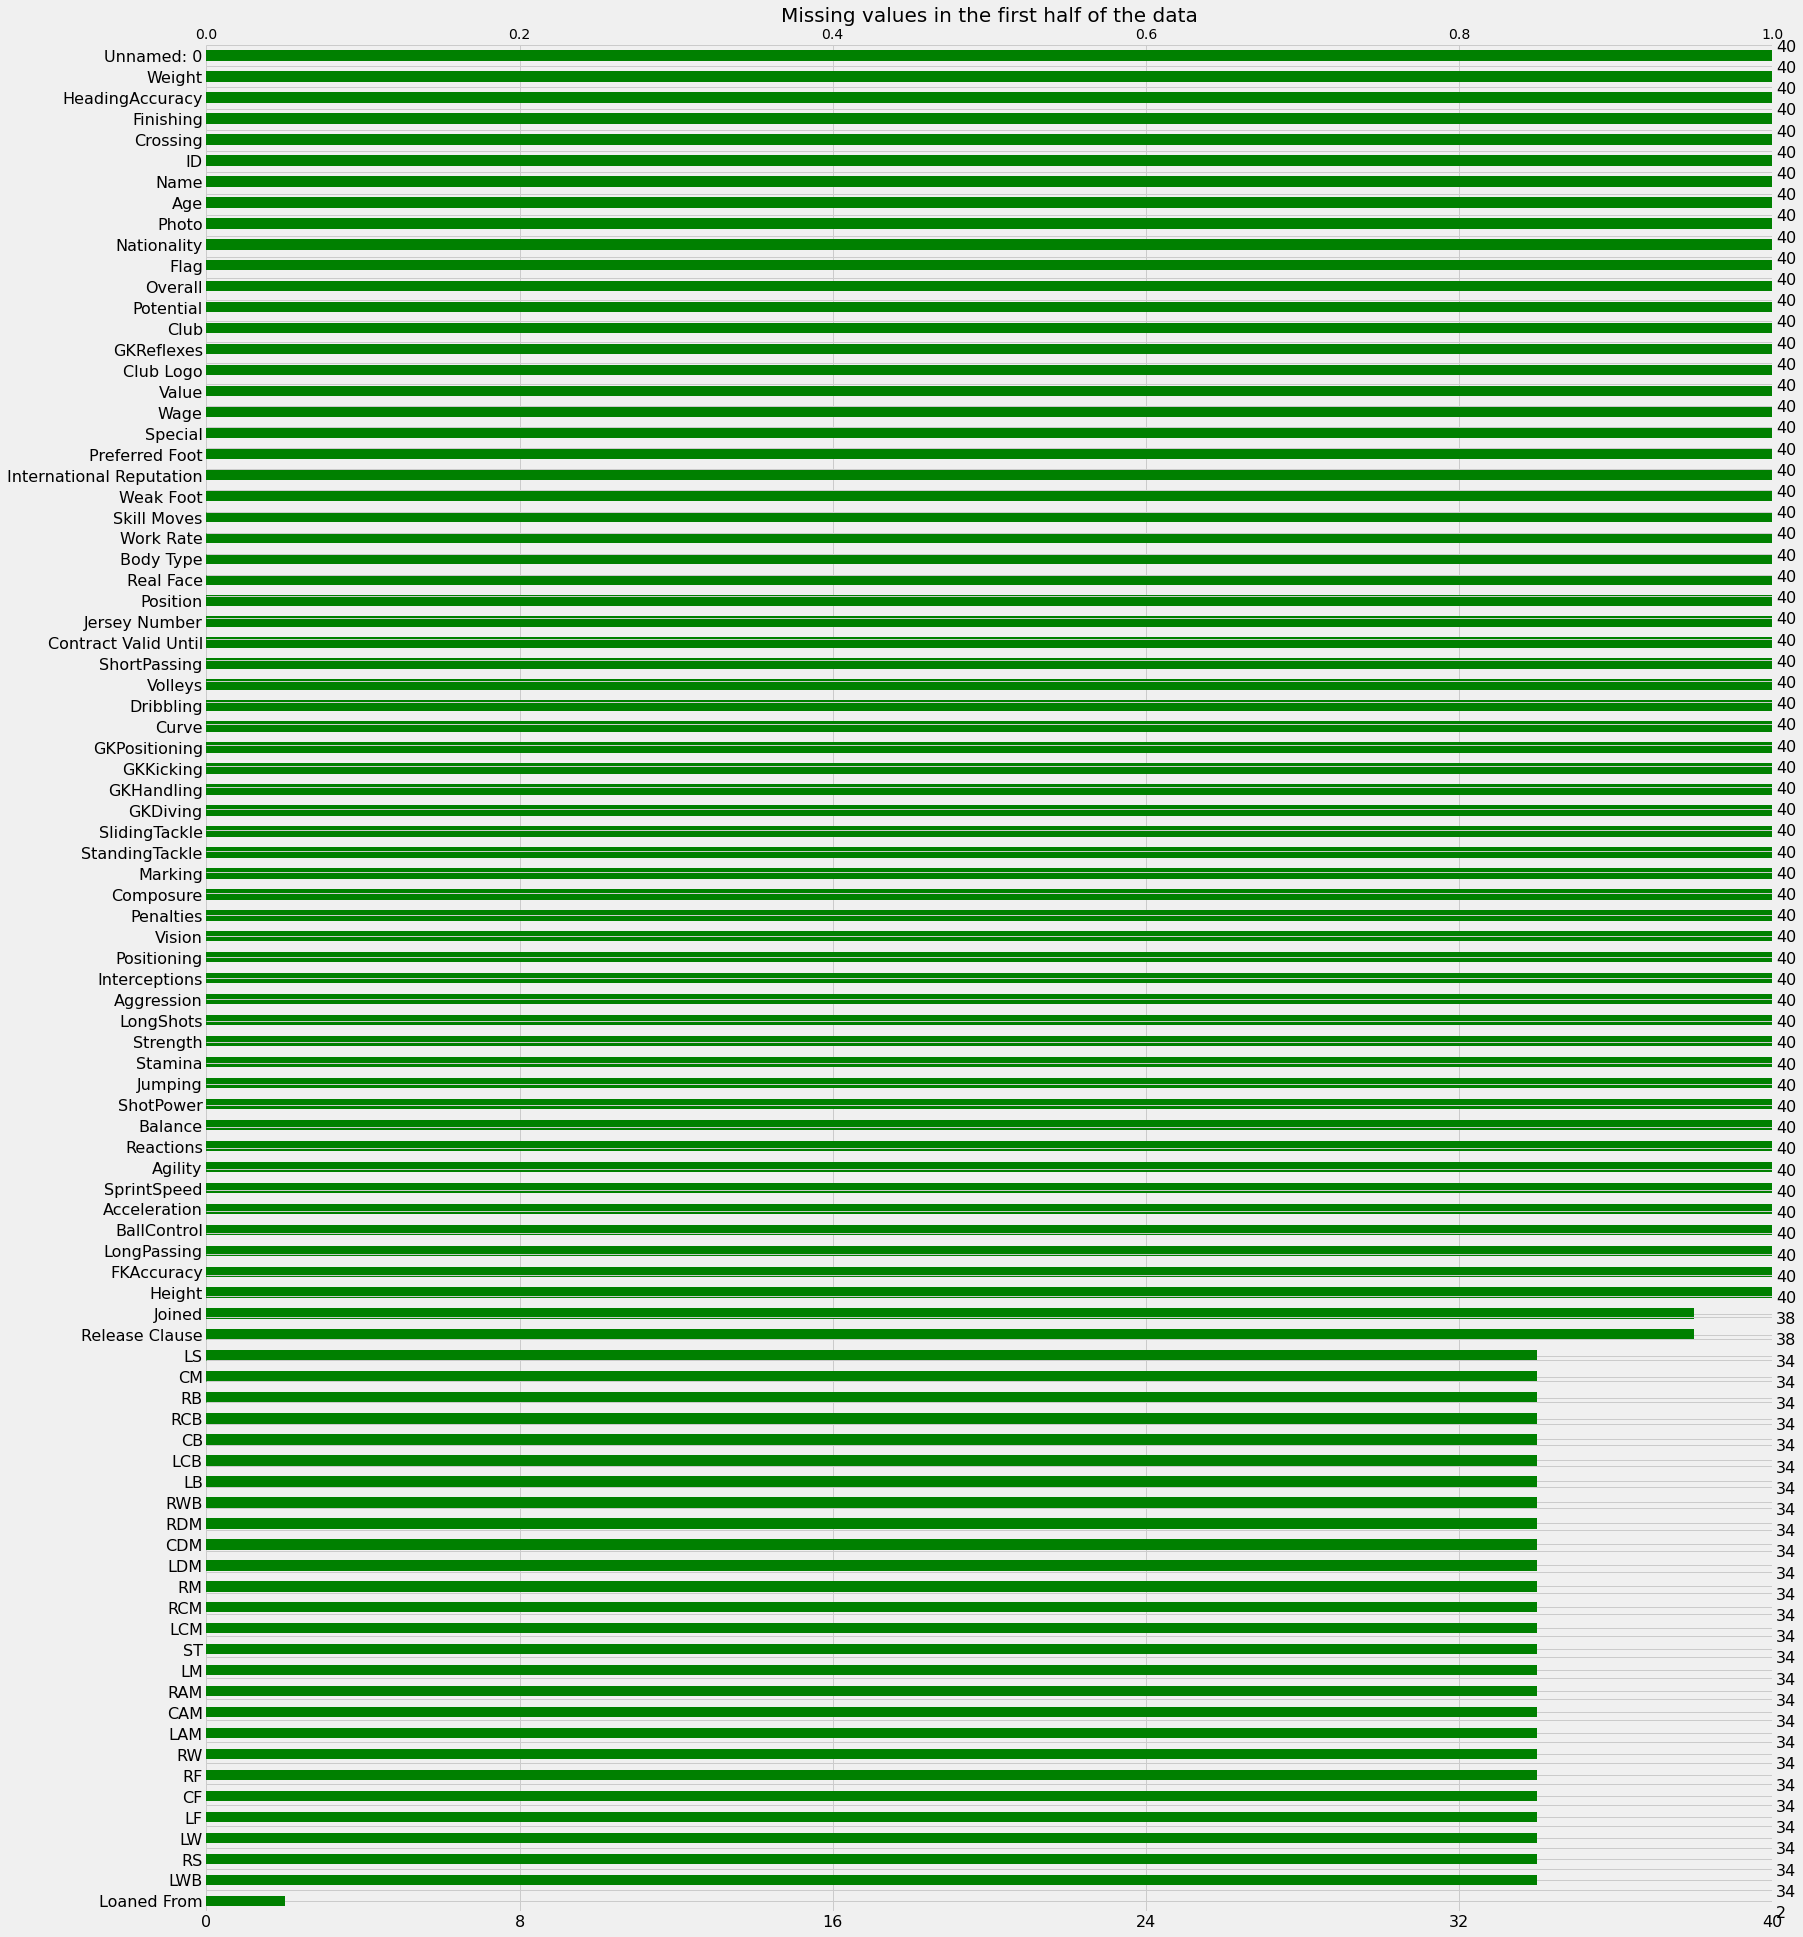

In [5]:
# checking if data contains any null value
# Visualizing missing values as a matrix

mno.bar(data.iloc[0:40], color='green', sort='ascending')
plt.title('Missing values in the first half of the data', fontsize = 20)
plt.show()

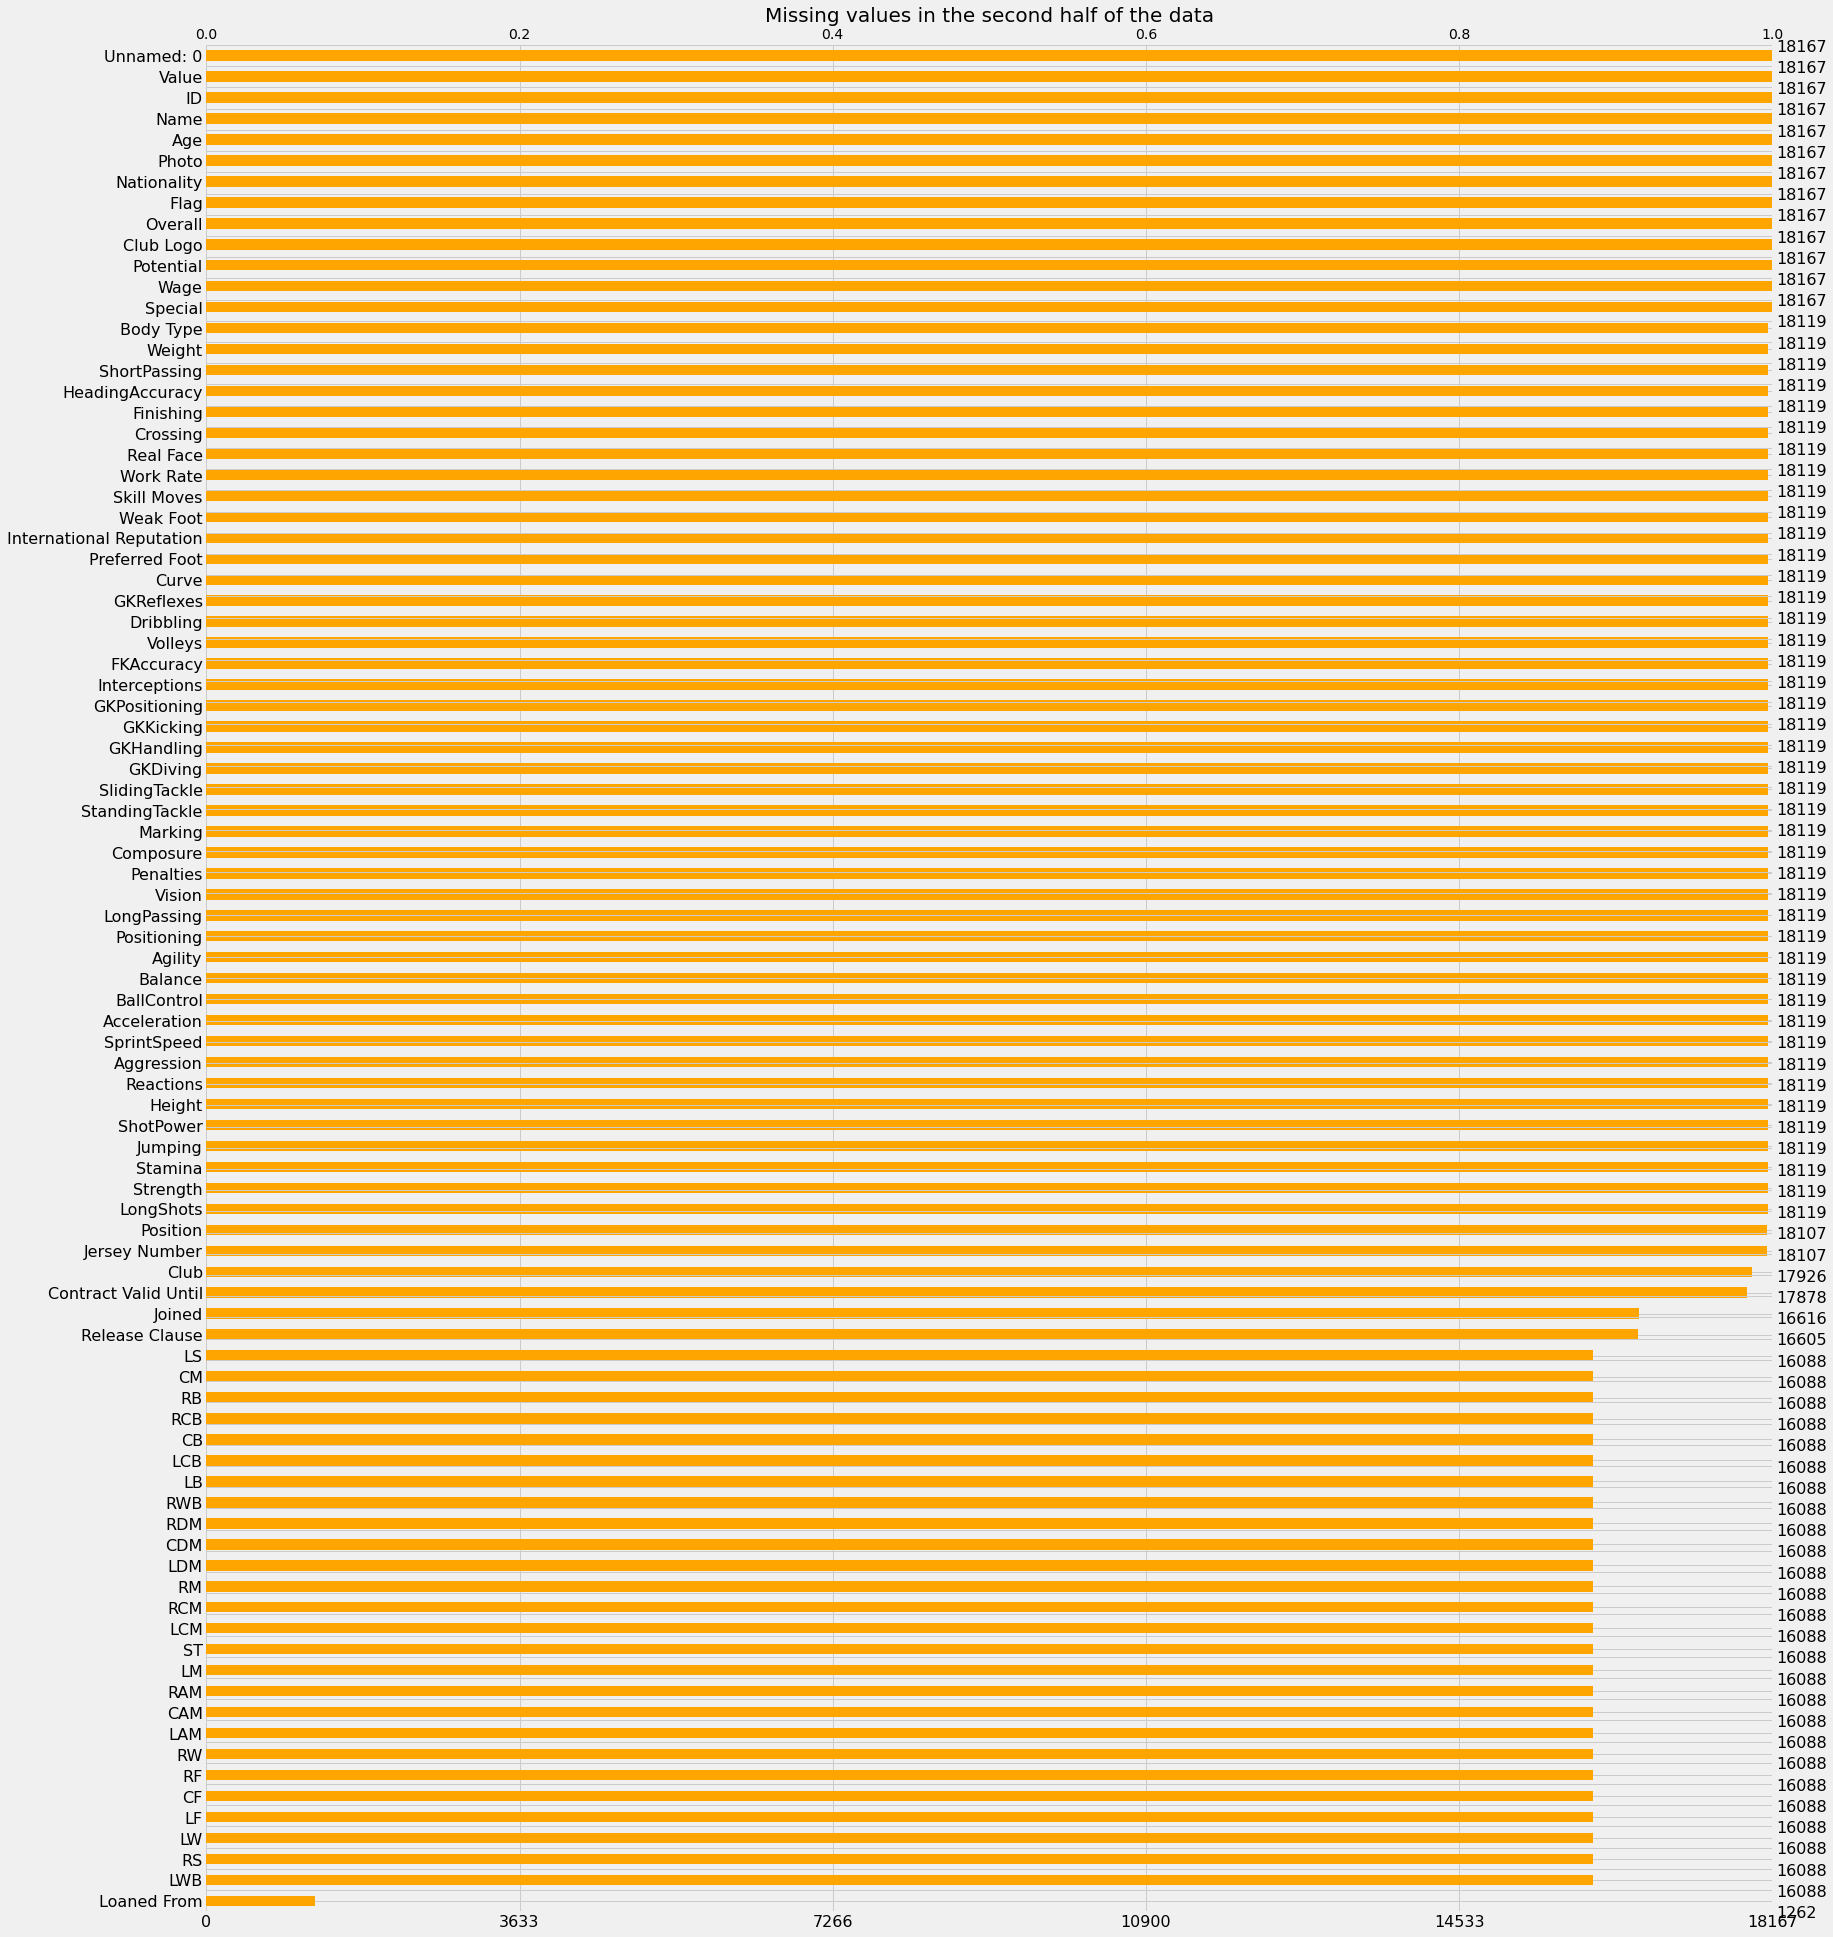

In [6]:
# Visualizing missing values as a matrix in the other half

mno.bar(data.iloc[40:], color='orange', sort='ascending')
plt.title('Missing values in the second half of the data', fontsize = 20)
plt.show()

## Missing values imputation

In [7]:
# filling the missing values for the continuous variables for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace=True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace=True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace=True)
data['Curve'].fillna(data['Curve'].mean(), inplace=True)
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(), inplace=True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace=True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace=True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace=True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace=True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace=True)

data['Weight'].fillna('200lbs', inplace=True)
data['Contract Valid Until'].fillna(2019, inplace=True)
data['Height'].fillna("5'11", inplace=True)
data['Loaned From'].fillna('None', inplace=True)
data['Joined'].fillna('Jul 1, 2018', inplace=True)
data['Jersey Number'].fillna(8, inplace=True)
data['Body Type'].fillna('Normal', inplace=True)
data['Position'].fillna('ST', inplace=True)
data['Club'].fillna('No Club', inplace=True)
data['Work Rate'].fillna('Medium/Medium', inplace=True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace=True)
data['Weak Foot'].fillna(3, inplace=True)
data['Preferred Foot'].fillna('Right', inplace=True)
data['International Reputation'].fillna(1, inplace=True)
data['Wage'].fillna('€200K', inplace=True)

In [8]:
pd.set_option('max_rows', 100)

data.isnull().sum()

Unnamed: 0                     0
ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                           0
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                     48
Position                       0
Jersey Number                  0
Joined                         0
Loaned From                    0
Contract Valid Until           0
Height                         0
Weight                         0
LS                          2085
ST                          2085
RS        

In [9]:
# inpute with 0 for rest of the columns
data.fillna(0, inplace=True)

# check whether data has any missing values
data.isnull().sum().sum()

0

## Feature Engineering

In [10]:
# Creating new features by aggregating the features

def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 'Agility', 'Reactions']].mean()).mean()))

def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower', 'LongShots', 'Penalties']].mean()).mean()))

In [11]:
# adding these categories to the data

data['Defending'] = data.apply(defending, axis=1)
data['General'] = data.apply(general, axis=1)
data['Mental'] = data.apply(mental, axis=1)
data['Passing'] = data.apply(passing, axis=1)
data['Mobility'] = data.apply(mobility, axis=1)
data['Power'] = data.apply(power, axis=1)
data['Rating'] = data.apply(rating, axis=1)
data['Shooting'] = data.apply(shooting, axis=1)

# check the new added column names in the data 
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [12]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,8.0,€226.5M,29,89,71,87,91,74,94,88
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,11.0,€127.1M,27,88,73,81,91,83,94,88
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,11.0,€228.1M,28,85,72,80,94,69,92,84
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,94.0,€138.6M,16,26,43,39,66,54,92,21
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,13.0,€196.4M,59,79,81,92,81,76,92,85


## Data Visualization

Text(0.5, 0.98, 'Score Distributions for Different Abilities')

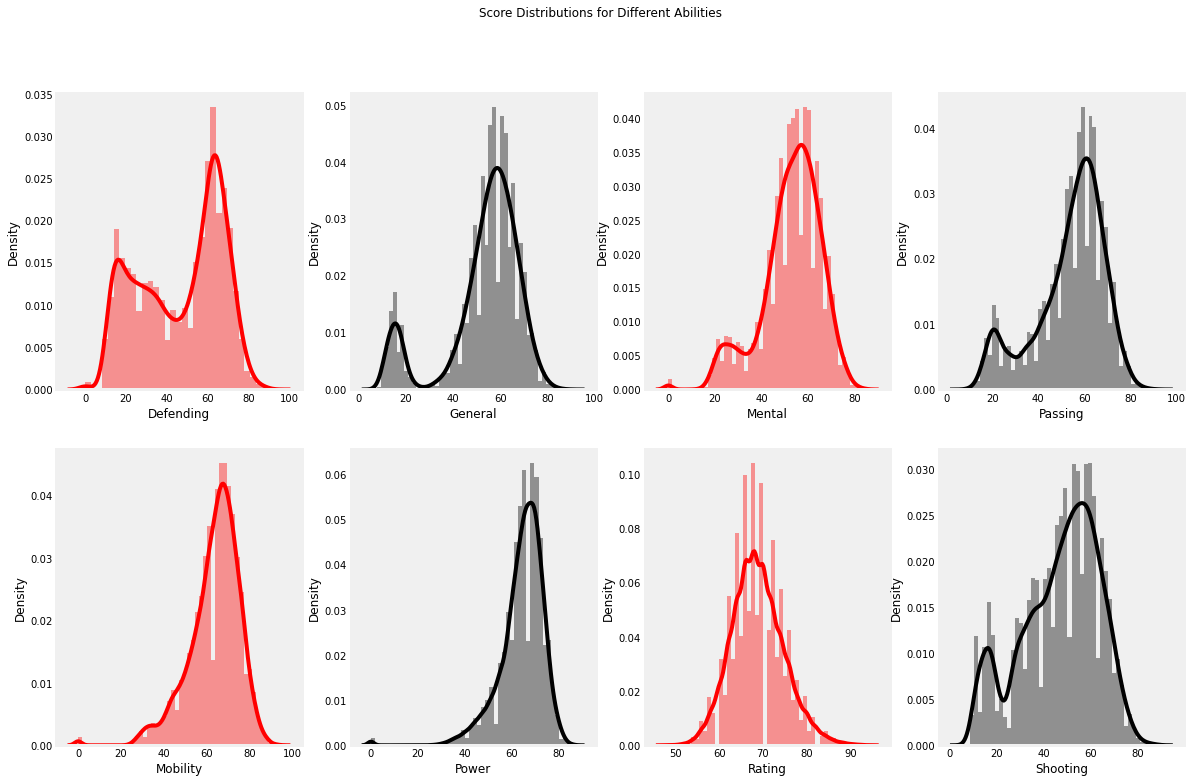

In [13]:
%matplotlib inline

# Check the distribution of the scores of Different Skills

plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2,4,1)
sns.distplot(data['Defending'], color='red')
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['General'], color='black')
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['Mental'], color='red')
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['Passing'], color='black')
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['Mobility'], color='red')
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['Power'], color='black')
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['Rating'], color='red')
plt.grid()

plt.subplot(2,4,8)
sns.distplot(data['Shooting'], color='black')
plt.grid()

plt.suptitle('Score Distributions for Different Abilities')


Text(0.5, 1.0, 'Most Preferred foot of the players')

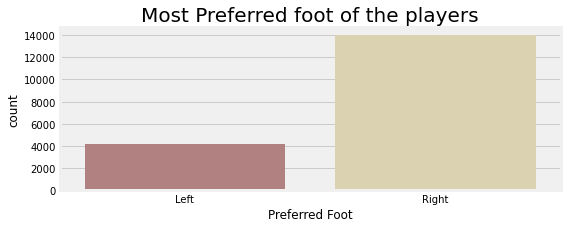

In [14]:
# Comparison of preferred foot over the different players

plt.rcParams['figure.figsize'] = (8,3)
sns.countplot(data['Preferred Foot'], palette='pink')
plt.title('Most Preferred foot of the players', fontsize=20)

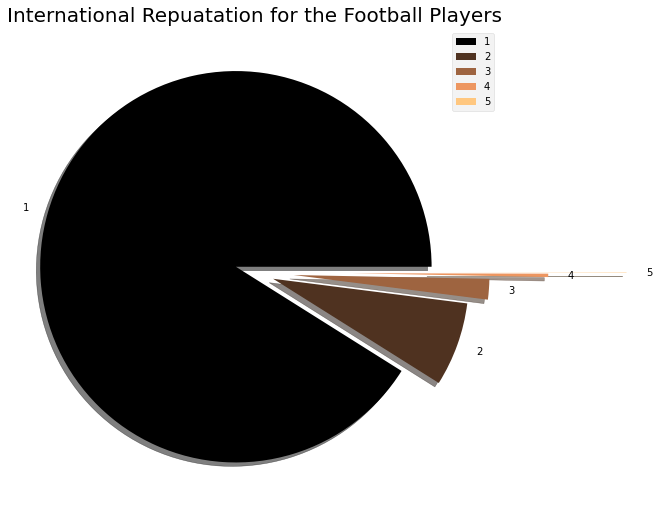

In [15]:
# plotting a pie chart to represent the share of International reputation

labels = ['1', '2', '3', '4', '5'] #data['International Reputation'].index
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0,1,5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True,)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()

In [16]:
# Players with the international repotation 5

data[data['International Reputation'] == 5][['Name', 'Nationality', 'Overall']].sort_values(by='Overall', 
                                                                                            ascending=False).style.background_gradient(cmap='magma')

,Name,Nationality,Overall
0,L. Messi,Argentina,94
1,Cristiano Ronaldo,Portugal,94
2,Neymar Jr,Brazil,92
7,L. Suárez,Uruguay,91
22,M. Neuer,Germany,89
109,Z. Ibrahimović,Sweden,85


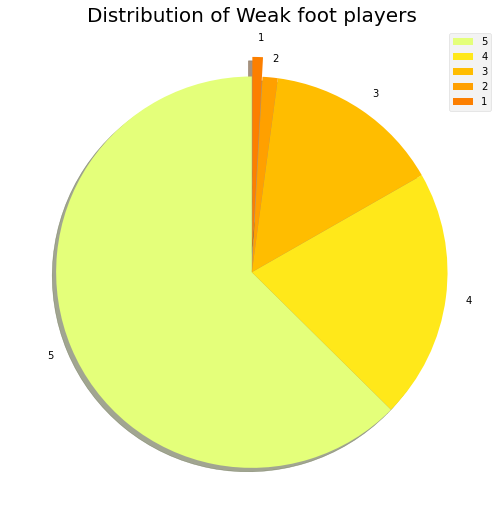

In [17]:
# Plotting a pie chart to represent the share of weak foot players 

labels = ['5', '4', '3', '2', '1']
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Distribution of Weak foot players', fontsize =20)
plt.legend()

Text(0.5, 1.0, 'Positions and no. of players')

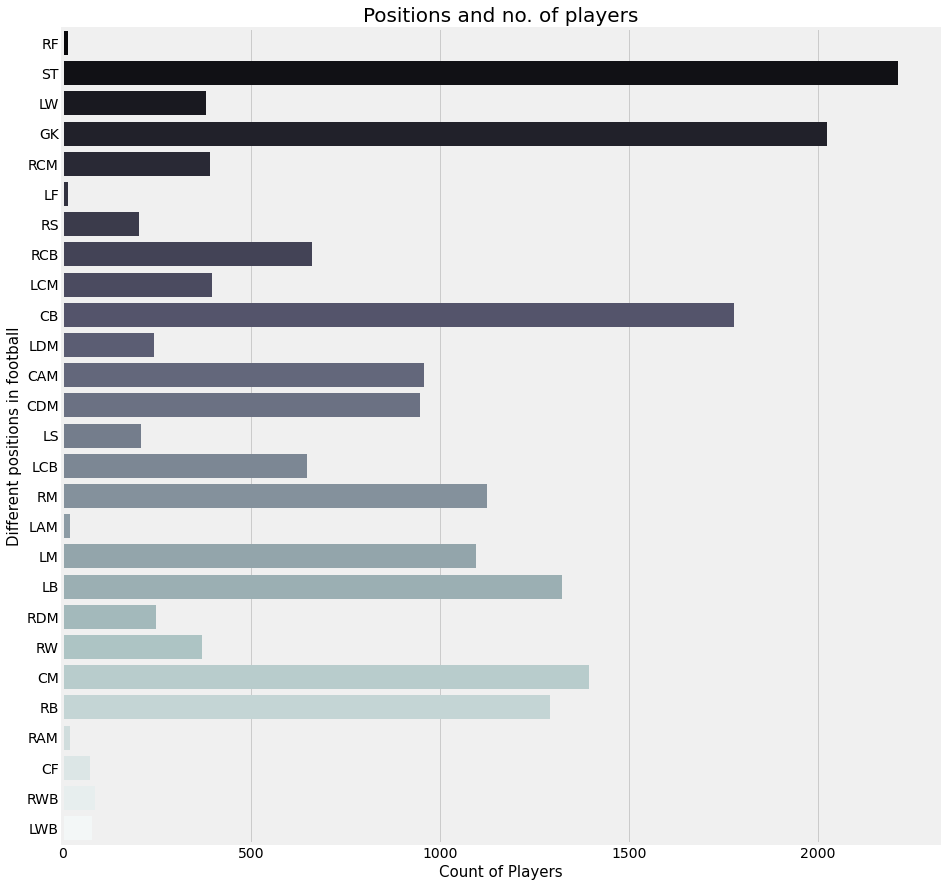

In [18]:
# different positions acquired by the players

plt.figure(figsize=(14,15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y='Position', data=data, palette='bone')
ax.set_xlabel(xlabel='Count of Players', fontsize=15)
ax.set_ylabel(ylabel='Different positions in football', fontsize=15)
ax.set_title(label='Positions and no. of players', fontsize=20)

Text(0.5, 1.0, 'Distribution of players weight')

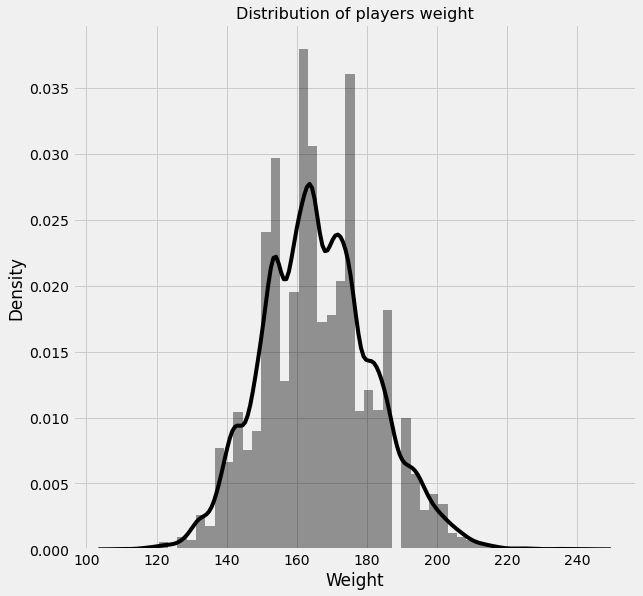

In [19]:
# Defining a function for cleaning the weight data

def extract_value_from(value):
    out = value.replace('lbs', '')
    return float(out)

# Applying the function to the weight column
data['Weight'] = data['Weight'].apply(lambda x: extract_value_from(x))

# plotting the distribution of weight of the players
sns.distplot(data['Weight'], color='black')
plt.title('Distribution of players weight', fontsize=16)

In [20]:
# Function for the wage and value column

def extract_value_from1(column):
    out = column.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in out:
        out = float(out.replace('K', ''))*1000
    return float(out)

Text(0.5, 1.0, 'Distribution of wages of the players')

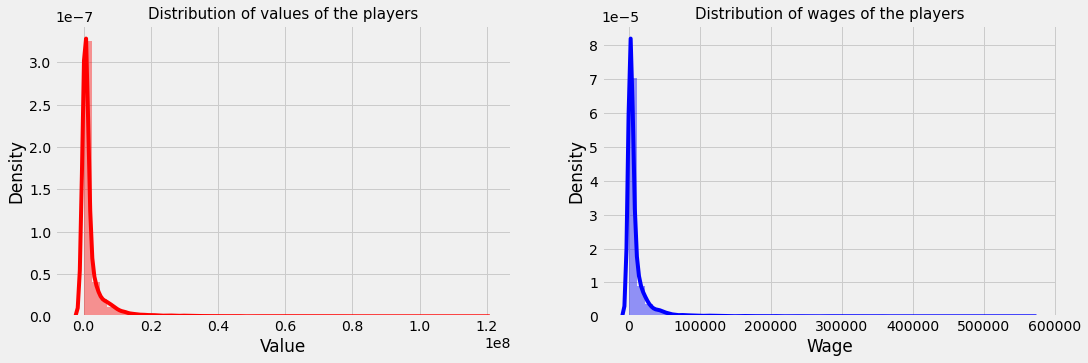

In [21]:
# applying the function to the wage and value column
data['Value'] = data['Value'].apply(lambda x: extract_value_from1(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from1(x))

# data visualization
plt.rcParams['figure.figsize'] = (16,5)

plt.subplot(1,2,1)
sns.distplot(data['Value'], color='red')
plt.title('Distribution of values of the players', fontsize=15)

plt.subplot(1,2,2)
sns.distplot(data['Wage'], color='blue')
plt.title('Distribution of wages of the players', fontsize=15)

Text(0, 0.5, 'Count')

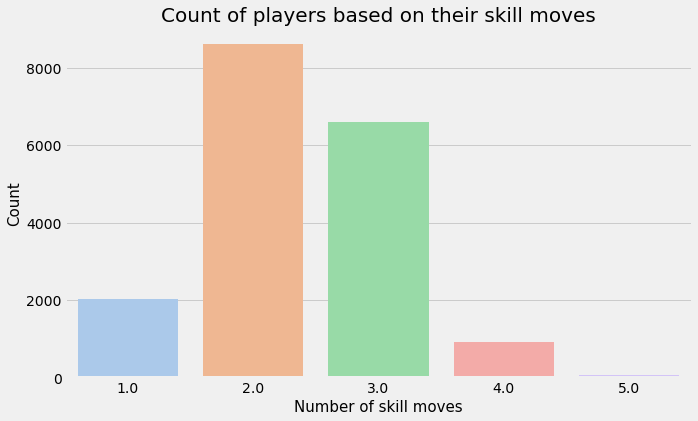

In [22]:
# Skill Movess of the players

plt.figure(figsize=(10,6))
ax = sns.countplot(x='Skill Moves', data=data, palette='pastel')
ax.set_title('Count of players based on their skill moves', fontsize=20)
ax.set_xlabel(xlabel='Number of skill moves', fontsize=15)
ax.set_ylabel(ylabel='Count', fontsize=15)

In [23]:
data[(data['Skill Moves']==5) & (data['Age']<20)][['Name', 'Age', 'Nationality', 'Overall']]

,Name,Age,Nationality,Overall
25,K. Mbappé,19,France,88
1004,J. Sancho,18,England,77
1143,Vinícius Júnior,17,Brazil,77
2495,M. Ødegaard,19,Norway,74


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Medium/ Medium'),
  Text(1, 0, 'High/ Low'),
  Text(2, 0, 'High/ Medium'),
  Text(3, 0, 'High/ High'),
  Text(4, 0, 'Medium/ High'),
  Text(5, 0, 'Medium/ Low'),
  Text(6, 0, 'Low/ High'),
  Text(7, 0, 'Low/ Medium'),
  Text(8, 0, 'Low/ Low'),
  Text(9, 0, 'Medium/Medium')])

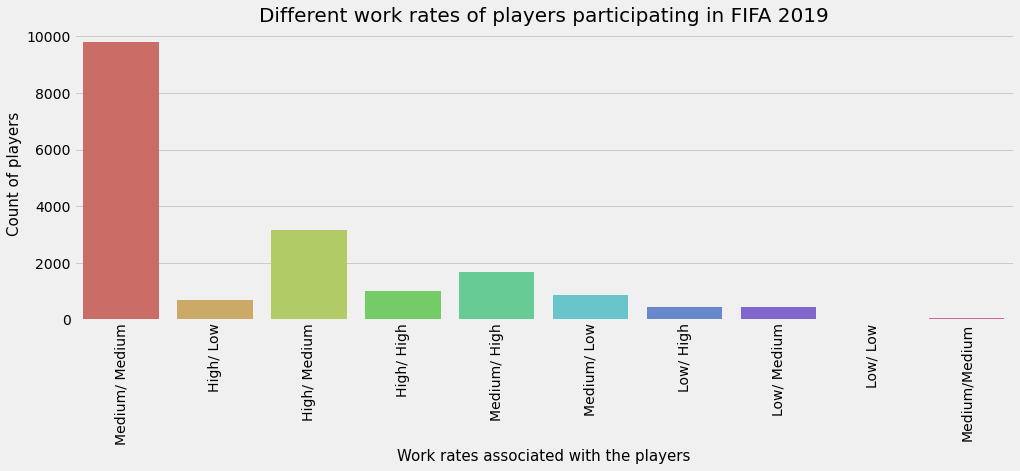

In [24]:
# Different work rates of players participating in FIFA 2019
plt.figure(figsize=(15, 5))
plt.style.use('fivethirtyeight')

sns.countplot(x='Work Rate', data=data, palette='hls')
plt.title('Different work rates of players participating in FIFA 2019', fontsize=20)
plt.xlabel('Work rates associated with the players', fontsize=15)
plt.ylabel('Count of players', fontsize=15)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Histogram of overall score of the players')

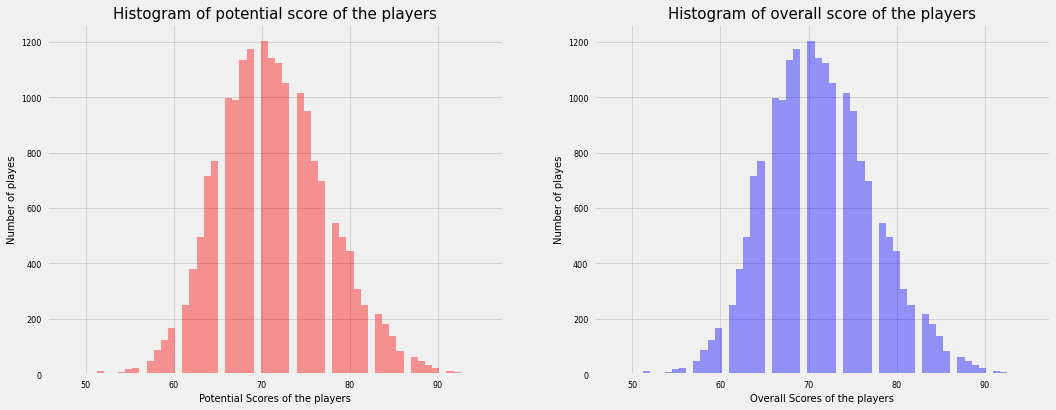

In [25]:
# Different potential scores of the players participating in FIFA 2019
plt.figure(figsize=(16,6))
plt.style.use('seaborn-paper')

plt.subplot(1,2,1)
x = data.Potential
ax = sns.distplot(x, bins=58, kde=False, color='red')
ax.set_xlabel(xlabel='Potential Scores of the players', fontsize=10)
ax.set_ylabel(ylabel='Number of playes', fontsize=10)
ax.set_title(label='Histogram of potential score of the players', fontsize=15)

plt.subplot(1,2,2)
y = data.Overall
ax = sns.distplot(x, bins=58, kde=False, color='blue')
ax.set_xlabel(xlabel='Overall Scores of the players', fontsize=10)
ax.set_ylabel(ylabel='Number of playes', fontsize=10)
ax.set_title(label='Histogram of overall score of the players', fontsize=15)

Text(0.5, 1.0, 'Comparison of Overall Scores and Age with respect to Preferred foot')

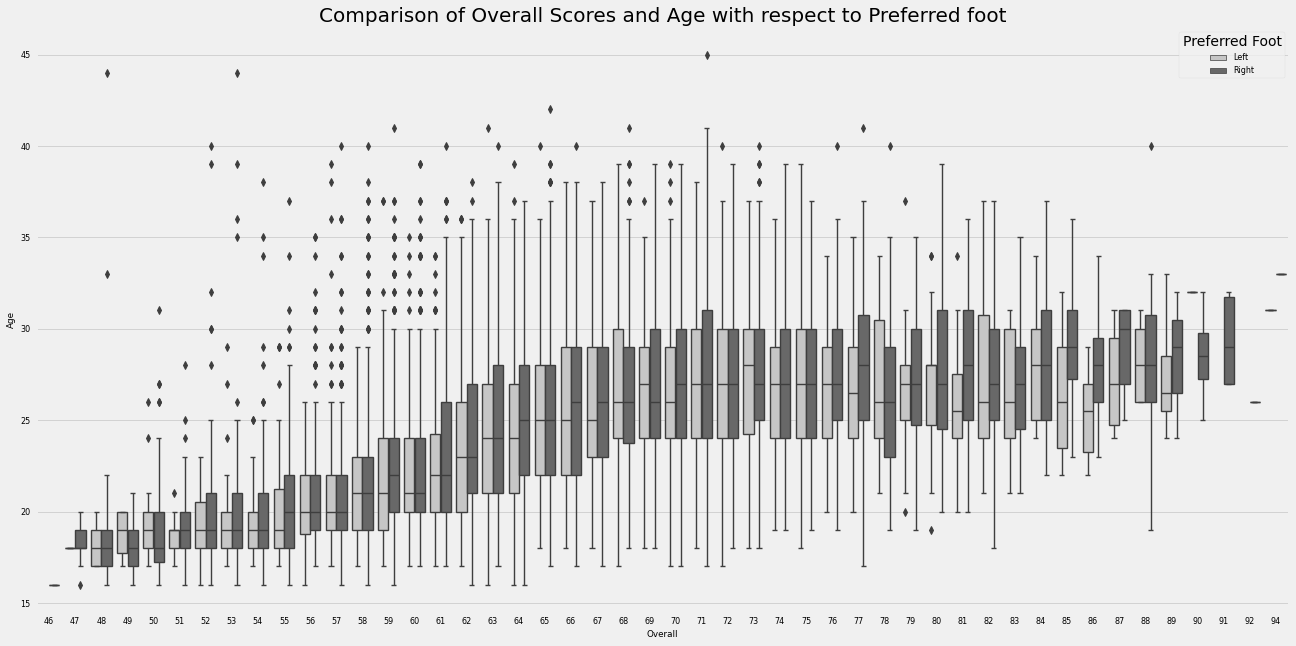

In [26]:
# Box Plot

plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('seaborn-dark-palette')

sns.boxplot(data['Overall'], data['Age'], hue=data['Preferred Foot'], palette='Greys')
plt.title('Comparison of Overall Scores and Age with respect to Preferred foot', fontsize=20)

#### Countries with the highest number of players

(-1.25, 1.25, -1.25, 1.25)

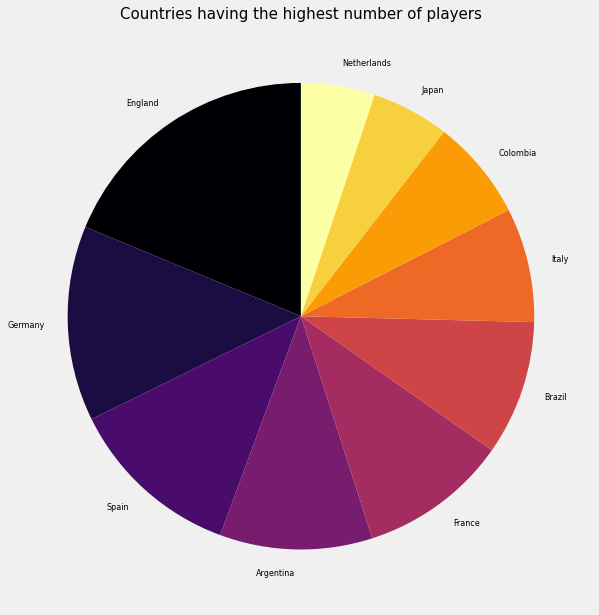

In [27]:
# Countries with the most players and comparison of their overall scores

data['Nationality'].value_counts().head(10).plot(kind='pie', cmap='inferno', startangle=90)
plt.title('Countries having the highest number of players', fontsize=15)
plt.axis('off')

Text(0.5, 1.0, 'Distribution of weight of players of some countries')

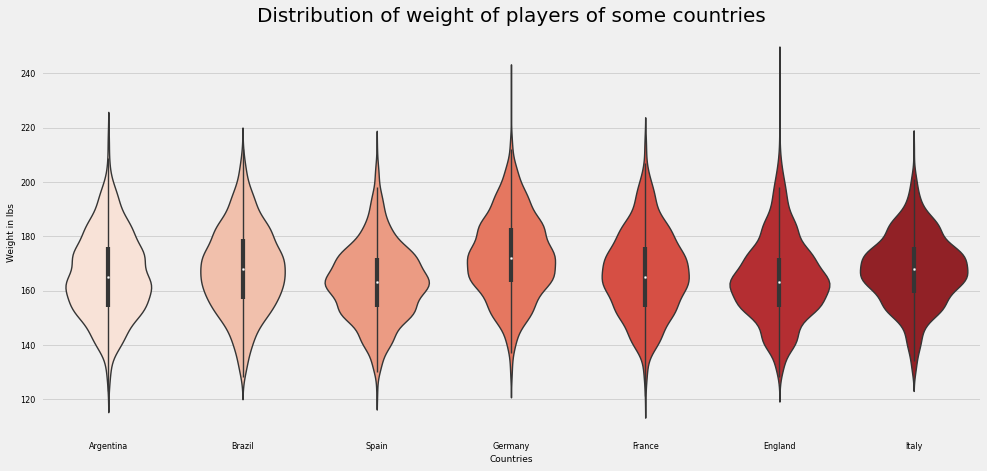

In [28]:
# Players of some countries and their weights

some_countries = ['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia']
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]

plt.rcParams['figure.figsize'] = (15,7)
ax = sns.violinplot(x=data_countries['Nationality'], y=data_countries['Weight'], palette='Reds')
ax.set_xlabel(xlabel='Countries', fontsize=9)
ax.set_ylabel(ylabel='Weight in lbs', fontsize=9)
ax.set_title(label='Distribution of weight of players of some countries', fontsize=20)

Text(0.5, 1.0, 'Distribution of overall score of players of some countries')

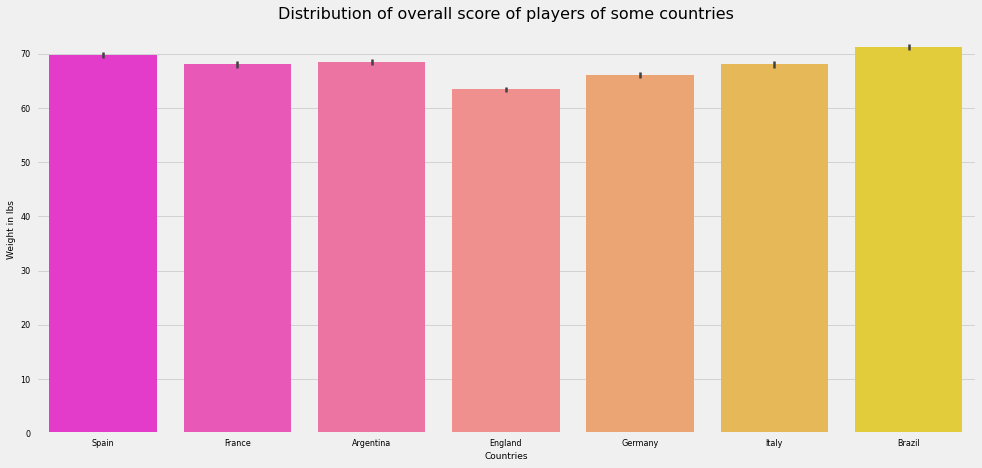

In [29]:
# # Players of some countries and their scores

some_countries = ['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia']
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (15,7)
ax = sns.barplot(x=data_countries['Nationality'], y=data_countries['Overall'], palette='spring')
ax.set_xlabel(xlabel='Countries', fontsize=9)
ax.set_ylabel(ylabel='Weight in lbs', fontsize=9)
ax.set_title(label='Distribution of overall score of players of some countries', fontsize=16)

Text(0.5, 1.0, 'Distribution of weight of players of some countries')

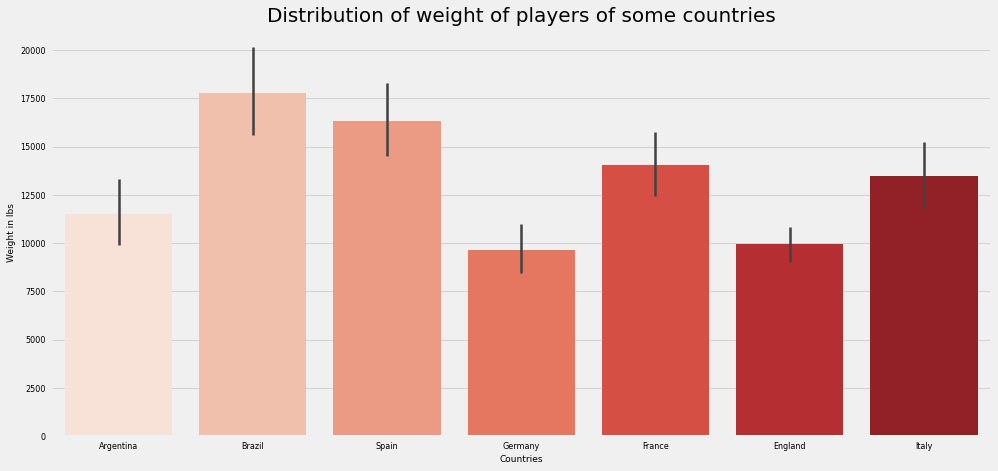

In [30]:
# Players of some countries and their wages

some_countries = ['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia']
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (15,7)
ax = sns.barplot(x=data_countries['Nationality'], y=data_countries['Wage'], palette='Reds')
ax.set_xlabel(xlabel='Countries', fontsize=9)
ax.set_ylabel(ylabel='Weight in lbs', fontsize=9)
ax.set_title(label='Distribution of weight of players of some countries', fontsize=20)

Text(0.5, 1.0, 'Distribution of weight of players of some countries')

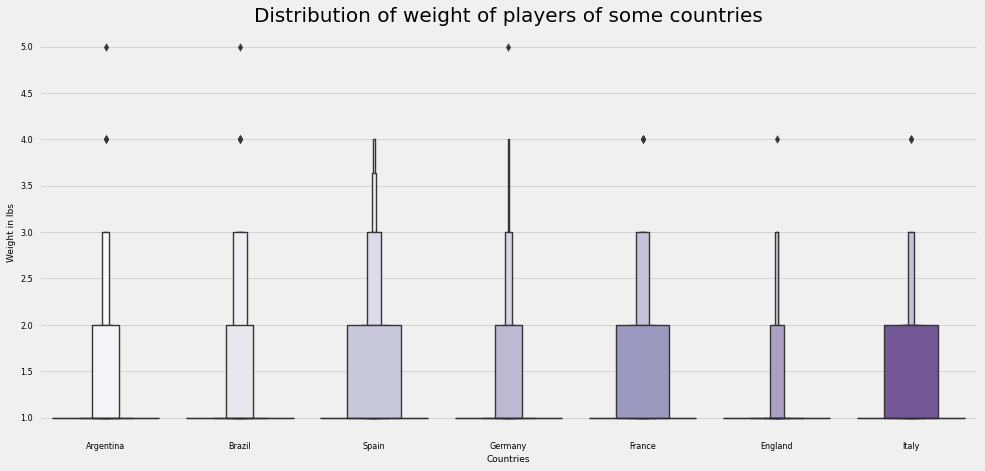

In [31]:
# Players of some countries and their international reputation

some_countries = ['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia']
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (15,7)
ax = sns.boxenplot(x=data_countries['Nationality'], y=data_countries['International Reputation'], palette='Purples')
ax.set_xlabel(xlabel='Countries', fontsize=9)
ax.set_ylabel(ylabel='Weight in lbs', fontsize=9)
ax.set_title(label='Distribution of weight of players of some countries', fontsize=20)

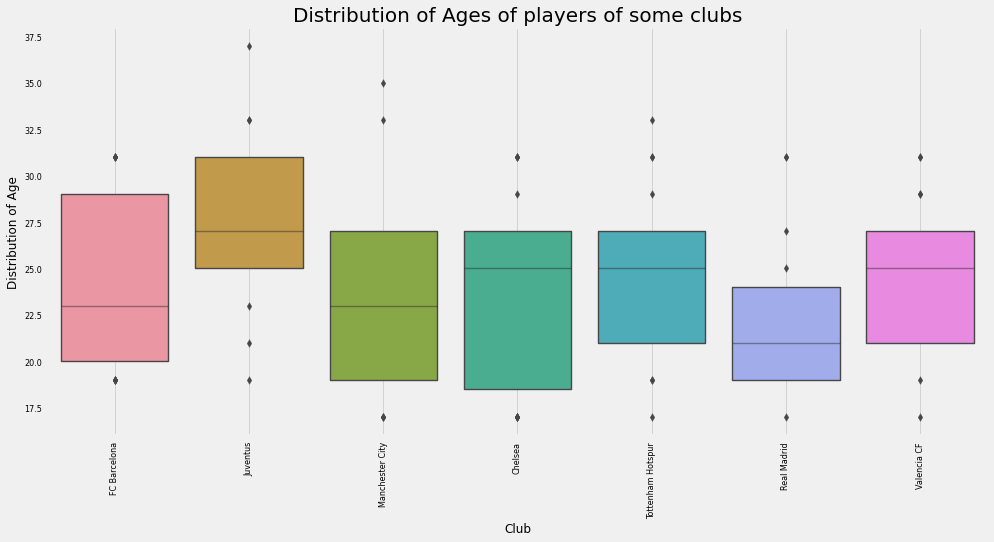

In [32]:
# Distribution of Ages in some of the popular football clubs

some_clubs = ['FC Barcelona', 'Real Madrid', 'Manchestre United', 'Chelsea', 'Manchester City', 
              'Tottenham Hotspur', 'Juventus', 'Valencia CF']

data_club = data.loc[data['Club'].isin(some_clubs) & data['Age']]

plt.rcParams['figure.figsize'] = (15,7)
ax = sns.boxenplot(x=data_club['Club'], y=data_club['Age'])
ax.set_xlabel(xlabel='Club', fontsize=12)
ax.set_ylabel(ylabel='Distribution of Age', fontsize=12)
ax.set_title(label='Distribution of Ages of players of some clubs', fontsize=20)
plt.xticks(rotation=90)
plt.grid()

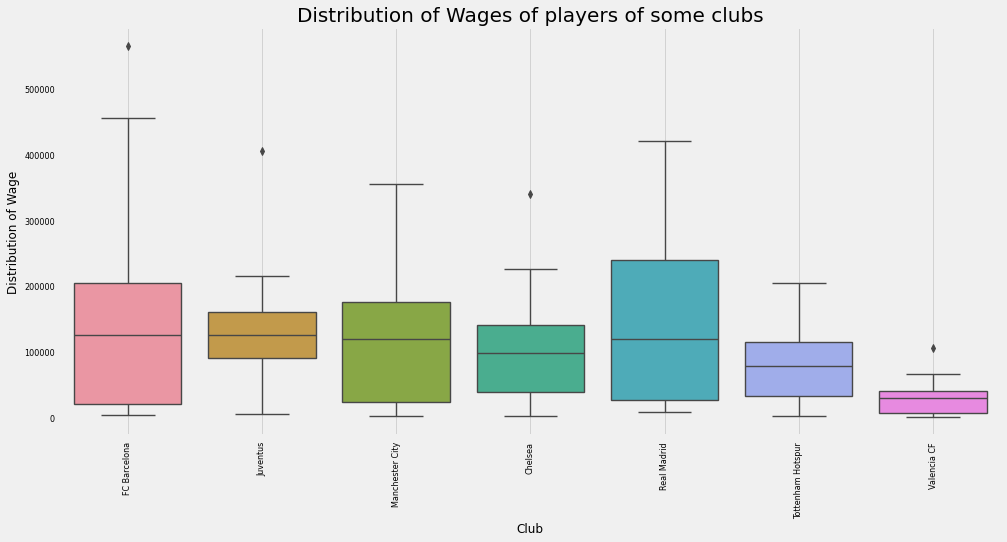

In [33]:
# Distribution of Wages in some of the popular football clubs

some_clubs = ['FC Barcelona', 'Real Madrid', 'Manchestre United', 'Chelsea', 'Manchester City', 
              'Tottenham Hotspur', 'Juventus', 'Valencia CF']

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (15,7)
ax = sns.boxplot(x=data_club['Club'], y=data_club['Wage'])
ax.set_xlabel(xlabel='Club', fontsize=12)
ax.set_ylabel(ylabel='Distribution of Wage', fontsize=12)
ax.set_title(label='Distribution of Wages of players of some clubs', fontsize=20)
plt.xticks(rotation=90)
plt.grid()

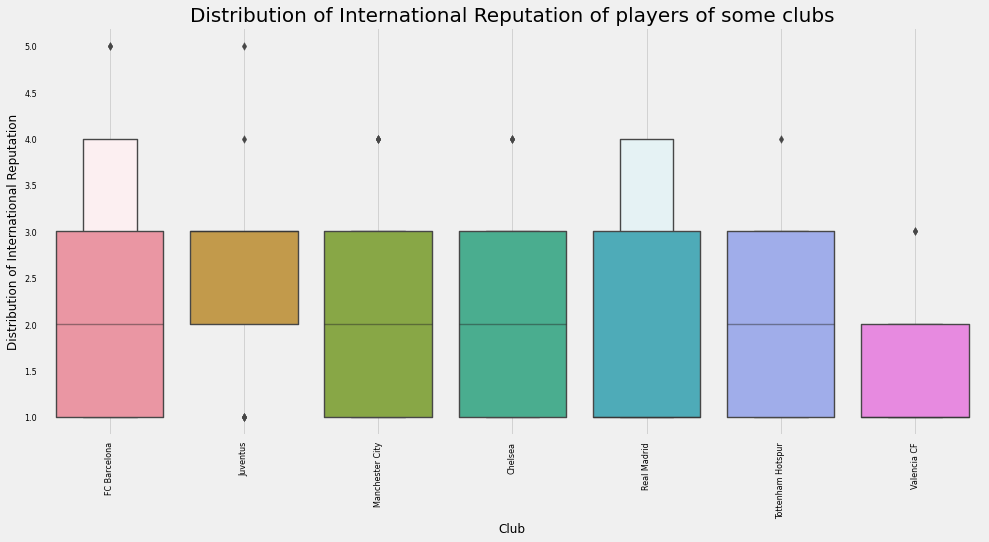

In [34]:
# Distribution of International Reputation in some of the popular football clubs

some_clubs = ['FC Barcelona', 'Real Madrid', 'Manchestre United', 'Chelsea', 'Manchester City', 
              'Tottenham Hotspur', 'Juventus', 'Valencia CF']

data_club = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (15,7)
ax = sns.boxenplot(x=data_club['Club'], y=data_club['International Reputation'])
ax.set_xlabel(xlabel='Club', fontsize=12)
ax.set_ylabel(ylabel='Distribution of International Reputation', fontsize=12)
ax.set_title(label='Distribution of International Reputation of players of some clubs', fontsize=20)
plt.xticks(rotation=90)
plt.grid()

## Query Analysis

In [35]:
# Best players at each position with their age, club, and nationality based on their overall scores

data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club',
                                                              'Nationality', 'Overall']].sort_values(by='Overall',
                                                            ascending=False)

,Position,Name,Age,Club,Nationality,Overall
1,ST,Cristiano Ronaldo,33,Juventus,Portugal,94
0,RF,L. Messi,31,FC Barcelona,Argentina,94
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92
5,LF,E. Hazard,27,Chelsea,Belgium,91
7,RS,L. Suárez,31,FC Barcelona,Uruguay,91
4,RCM,K. De Bruyne,27,Manchester City,Belgium,91
3,GK,De Gea,27,Manchester United,Spain,91
8,RCB,Sergio Ramos,32,Real Madrid,Spain,91
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
11,LCM,T. Kroos,28,Real Madrid,Germany,90


In [36]:
# Best player for each skill
@interact
def skill(skills=['Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power', 'Rating',
                  'Shooting'], score=75):
    return data[data[skills]>score][['Name', 'Nationality', 'Club', 'Overall', skills]].sort_values(by=skills,
                                    ascending=False).head(20).style.background_gradient(cmap='Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

In [37]:
# Interactive function to get the top 15 players from each country

@interact

def country(country=list(data['Nationality'].value_counts().index)):
    return data[data['Nationality'] == country][['Name', 'Position', 
                                                 'Potential', 'Overall']].sort_values(by='Overall',
                                                ascending=False).head(15).style.background_gradient('magma')

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

In [38]:
# Interactive function to get top 15 players from each club

@interact
def club(club=list(data['Club'].value_counts().index)):
    return data[data['Club']==club][['Name', 'Position',
                                'Potential', 'Overall']].head(15).sort_values(by='Overall', 
                                        ascending=False).style.background_gradient('magma')

interactive(children=(Dropdown(description='club', options=('No Club', 'Liverpool', 'Frosinone', 'CD Leganés',…

In [39]:
# 5 youngest players from the FIFA 2019

youngest = data[data['Age']==16][['Name', 'Age', 'Nationality', 'Club', 'Overall']]
youngest.sort_values(by='Overall', ascending=False).head(5).style.background_gradient('Reds')

,Name,Age,Nationality,Club,Overall
11457,W. Geubbels,16,France,AS Monaco,64
11732,A. Taoui,16,France,Toulouse Football Club,64
12496,Pelayo Morilla,16,Spain,Real Sporting de Gijón,63
12828,Guerrero,16,Spain,CF Rayo Majadahonda,63
13293,H. Massengo,16,France,AS Monaco,62


In [40]:
# 15 eldest players in FIFA 2019

eldest = data[['Name', 'Age', 'Nationality', 'Club', 'Overall']].sort_values(by='Age', ascending=False)
eldest.head(15).style.background_gradient('Blues')

,Name,Age,Nationality,Club,Overall
4741,O. Pérez,45,Mexico,Pachuca,71
18183,K. Pilkington,44,England,Cambridge United,48
17726,T. Warner,44,Trinidad & Tobago,Accrington Stanley,53
10545,S. Narazaki,42,Japan,Nagoya Grampus,65
7225,C. Muñoz,41,Argentina,CD Universidad de Concepción,68
1120,J. Villar,41,Paraguay,No Club,77
12192,H. Sulaimani,41,Saudi Arabia,Ohod Club,63
15426,M. Tyler,41,England,Peterborough United,59
4228,B. Nivet,41,France,ESTAC Troyes,71
10356,F. Kippe,40,Norway,Lillestrøm SK,65


In [41]:
# The longest membership in the club

now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by='Years_of_member', ascending=False).head(10)
membership.set_index('Name', inplace=True)
membership.style.background_gradient(cmap='Reds')

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,30
M. Al Shalhoub,Al Hilal,23
H. Sogahata,Kashima Antlers,23
M. Ogasawara,Kashima Antlers,23
S. Narazaki,Nagoya Grampus,22
M. Wölfli,BSC Young Boys,21
K. Kitamoto,Vissel Kobe,21
C. Källqvist,BK Häcken,20
Y. Endo,Gamba Osaka,20


In [42]:
import ipywidgets as widgets
from ipywidgets import interact
@interact
def check(column='Years_of_member',
         club=['FC Barcelona', 'Chelsea', 'Real Madrid', 'Manchester City','Manchester United'], x=4):
    return data[(data[column] > x) & (data['Club']==club)][['Name', 'Club',
                                                'Years_of_member']].sort_values(by='Years_of_member', 
                                                        ascending=False).style.background_gradient(cmap='Blues')

interactive(children=(Text(value='Years_of_member', description='column'), Dropdown(description='club', option…

In [43]:
# Defining the features of the players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure',
                  'Crossing', 'Dribbling', 'FKAccuracy',
                  'Finishing', 'GKDiving', 'GKHandling',
                  'GKKicking', 'GKPositioning', 'GKReflexes',
                  'HeadingAccuracy', 'Interceptions', 'Jumping',
                  'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

In [44]:
# Top 10 left footed footballers

data[data['Preferred Foot'] == 'Left'][['Name', 'Club', 'Nationality', 
                                        'Club', 'Overall']].sort_values(by='Overall', 
                                        ascending=False).head(10)

,Name,Club,Nationality,Club,Overall
0,L. Messi,FC Barcelona,Argentina,FC Barcelona,94
13,David Silva,Manchester City,Spain,Manchester City,90
15,P. Dybala,Juventus,Argentina,Juventus,89
17,A. Griezmann,Atlético Madrid,France,Atlético Madrid,89
19,T. Courtois,Real Madrid,Belgium,Real Madrid,89
24,G. Chiellini,Juventus,Italy,Juventus,89
35,Marcelo,Real Madrid,Brazil,Real Madrid,88
37,H. Lloris,Tottenham Hotspur,France,Tottenham Hotspur,88
36,G. Bale,Real Madrid,Wales,Real Madrid,88
28,J. Rodríguez,FC Bayern München,Colombia,FC Bayern München,88


In [45]:
# Top 10 Right footed footballers

data[data['Preferred Foot'] == 'Right'][['Name', 'Club', 'Nationality', 
                                        'Club', 'Overall']].sort_values(by='Overall', 
                                        ascending=False).head(10)

,Name,Club,Nationality,Club,Overall
1,Cristiano Ronaldo,Juventus,Portugal,Juventus,94
2,Neymar Jr,Paris Saint-Germain,Brazil,Paris Saint-Germain,92
3,De Gea,Manchester United,Spain,Manchester United,91
4,K. De Bruyne,Manchester City,Belgium,Manchester City,91
5,E. Hazard,Chelsea,Belgium,Chelsea,91
6,L. Modrić,Real Madrid,Croatia,Real Madrid,91
7,L. Suárez,FC Barcelona,Uruguay,FC Barcelona,91
8,Sergio Ramos,Real Madrid,Spain,Real Madrid,91
9,J. Oblak,Atlético Madrid,Slovenia,Atlético Madrid,90
10,R. Lewandowski,FC Bayern München,Poland,FC Bayern München,90


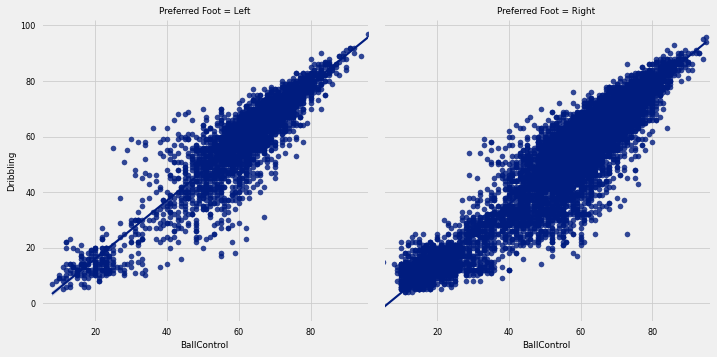

In [46]:
# Comparison of the performance of the left footed players and right footed players by ballcontrol and dribbling

sns.lmplot(x='BallControl', y='Dribbling', data=data, col='Preferred Foot')

In [48]:
# Function to generate a report about a player

def report(player):
    return data[data['Name']==player][['Nationality', 'Club', 'Overall',
                                      'Potential', 'Wage', 'Contract Valid Until',
                                      'International Reputation']].reset_index(drop=True).T
report('L. Messi')

,0
Nationality,Argentina
Club,FC Barcelona
Overall,94
Potential,94
Wage,565000.0
Contract Valid Until,2021
International Reputation,5.0
